<a href="https://colab.research.google.com/github/fmejias/CienciasDeLosDatosTEC/blob/master/TP2/TP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Matemáticas para Ciencias de los Datos
# Trabajo práctico 2

- Professor: M.Sc.Saul Calderon.

- Students: 
    - María Auxiliadora Mora, Instituto Tecnológico de Costa Rica  
    - Felipe Alberto Mejías Loría, Instituto Tecnológico de Costa Rica. 

- June 1th, 2019   

In [0]:
# Libraries required for the exercises
import torch as torch
import numpy as np
import random
import math

from torch.distributions import constraints
from torch.distributions.distribution import Distribution
from torch.distributions.utils import _standard_normal, lazy_property

import torch.distributions as distrib

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# 1) Generar puntos plano (20 puntos)



Matrix X: 
 tensor([[  3.0000,   3.6000,   4.2000,   4.8000,   5.4000,   6.0000,   6.6000,
           7.2000,   7.8000,   8.4000,   9.0000,   9.6000,  10.2000,  10.8000,
          11.4000,  12.0000,  12.6000,  13.2000,  13.8000,  14.4000],
        [ 20.0000,  26.5000,  33.0000,  39.5000,  46.0000,  52.5000,  59.0000,
          65.5000,  72.0000,  78.5000,  85.0000,  91.5000,  98.0000, 104.5000,
         111.0000, 117.5000, 124.0000, 130.5000, 137.0000, 143.5000],
        [ 20.6629,  27.2689,  33.9030,  40.4084,  47.0417,  53.6851,  60.2983,
          66.9784,  73.5027,  80.2253,  86.7664,  93.4084, 100.0690, 106.6979,
         113.2525, 119.9425, 126.5771, 133.1572, 139.6841, 146.4293]])


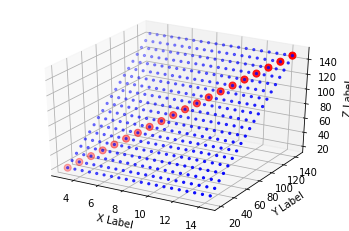

In [83]:
# Exercise 1
def generarPuntosPlano(n=20, mean=0, standardDeviation=0.05):
  """
  This function calculates a dataset and the plot them in 3D
  n: number of points
  mean: mean for the Gaussian distribution
  standardDeviation: standardDeviation for the Gaussian distribution
  return a plot in 3D of the dataset
  """
  
  def scatterPlotDataset3D(x, y ,z, epsilon):
    """
    Scatter plot the dataset
    param dataset: dataset to plot  
    """
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Create 2D tensors with variation along the two axis
    X,Y = torch.meshgrid(x, y)

    # Compute hiperplane function to scattered all plane
    Z = 0.2 * X + Y + epsilon
    
    # Scattered all plane
    ax.scatter(X.numpy(), Y.numpy(), Z.numpy(), c='b', marker='.')
    
    # Scattered n points
    ax.scatter(x.numpy(), y.numpy(), z.numpy(), s=50, c='r', marker='o')

    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')

    plt.show()
    
  def epsilon():
    """
    Create Dataset with gaussian distribution
    param numSamples, number of samples
    """
    #create Gaussian distribution
    distribution = distrib.Normal(mean, standardDeviation)
    #create dataset from distribution
    return distribution.sample((n,))
  
  def plottingPlane():
    
    # Create 1D tensors x and y
    x = torch.arange(3, 15, 0.6)
    y = torch.arange(20, 150, 6.5)
    e = epsilon()
    
    # Hiperplane function
    z = 0.2 * x + y + e
    
    # Save points on a Matrix X
    matrixX = [x, y , z]
    matrixX = torch.stack(matrixX)
    print("Matrix X: \n", matrixX)
    
    # Scattered points in the plane
    scatterPlotDataset3D(x ,y, z, e)
    
    return matrixX
    
  # Plot the dataset  
  return plottingPlane()
  
  
# Test exercise 1
matrizX = generarPuntosPlano()



# 2) Calcular EigenVectores y Valores (30 puntos)

In [0]:
## Exercise 4
def checkMatrixPropertyExercise4(A, x):
    """
    Evaluate the property of matrices and vectors described in Exercise 4.
    A: squared matrix of size n.
    x: vector of size 1 x n.
    Return: 1 if the equation of question 4 is true 
            otherwise it returns 0.
    """
    # Calculate a symmetric matrix using A   
    S = 0.5* A + 0.5* A.transpose(0, 1)
    print("Matriz transpuesta", S)
    
    #Calculate the transpose of x. 
    w2Drow = x.reshape(-1, x.shape[0])
    xT = w2Drow.transpose(0, 1)
    
    ## 1- Calculate the equation's left side 
    # Matrix - vector product
    SxT = S.mm(xT)     
    product = (x * SxT.reshape(-1, SxT.shape[0])[0, :])
    
    #Product transpose 
    w2Drow = product.reshape(-1, product.shape[0])
    left = w2Drow.transpose(0, 1).sum()
    print("Lado izquierdo de la ecuación: ", left)
    
    
    ## 2 - Calculate the rigth side
    # Matrix - vector product
    SxT = S.mm(xT)     
    right = (x * SxT.reshape(-1, SxT.shape[0])[0, :]).sum()
    print("Lado derecho de la ecuación: ", right)
    
    return (left - right).sum() <  0.1e-5


# Test Exercise 4 using a ramdon matrix
# Generates a random number between 
# a given positive range 
n = random.randint(3, 10) 

A = torch.randn(n,n)
x = torch.randn(n)

print("Resultado ejercicio 4: ", checkMatrixPropertyExercise4(A, x))



Matriz transpuesta tensor([[-1.5883, -1.1411,  0.6409,  0.1437,  1.2537, -1.3886, -1.5240,  0.0328,
          0.8320],
        [-1.1411,  1.0079, -0.1832,  0.2861,  0.4783,  0.6423, -0.6522, -0.5614,
          0.1148],
        [ 0.6409, -0.1832,  0.4207,  0.1962,  0.8662,  0.6447, -0.4144,  1.1734,
          0.5646],
        [ 0.1437,  0.2861,  0.1962, -0.0808, -0.2412, -0.1028,  0.6016,  0.5373,
          1.1485],
        [ 1.2537,  0.4783,  0.8662, -0.2412,  0.7078,  0.2802,  0.2215,  0.5603,
          0.8547],
        [-1.3886,  0.6423,  0.6447, -0.1028,  0.2802, -1.1723, -0.1855, -0.0054,
          0.4630],
        [-1.5240, -0.6522, -0.4144,  0.6016,  0.2215, -0.1855, -0.2392, -0.6636,
         -1.1807],
        [ 0.0328, -0.5614,  1.1734,  0.5373,  0.5603, -0.0054, -0.6636,  0.3880,
          0.6020],
        [ 0.8320,  0.1148,  0.5646,  1.1485,  0.8547,  0.4630, -1.1807,  0.6020,
          0.1373]])
tensor(-14.1173)
tensor(-14.1173)
Resultado ejercicio 4:  tensor(1, dtype=torch.

# 4) Reducir la dimensionalidad de un dataset (40 puntos)

In [0]:
## Exercise 6
def covariance(A) :
    """
    Calculate the covariance of a matrix 
    A: Matrix with the set of samples.
    Return: The covariance matrix of A
    """
    # the rows mean of A  
    AMean= A.mean(1)

    #1 / (Number of samples - 1)
    n = (1/(A.shape[1]-1))
    
    #Calculate the transpose of the rows mean. 
    w2Drow = AMean.reshape(-1, AMean.shape[0])
    AMeanT = w2Drow.transpose(0, 1)
    
    
    # Calculate the mean of A minus A.
    UA = AMeanT - A
    
    # Compute the UA transpose. 
    UAT= UA.transpose(0,1)
    
    # Covariance of A
    Cov = n * UA.mm(UAT)
  
    return Cov


# Test the covariance fuction.

#Test using the example matrix
A = torch.tensor([[2.0, 4.0, 6.0, 8.0], [4.0, 8.0, 12.0, 16.0], [12.0, 10.0, 5.0, 9.0]])

CovA = covariance(A)

print("Matriz de covarianza del ejemplo:", CovA)


#Test using a random matriz 

# Generates a random number between 
# a given positive range 
n = random.randint(3, 10) 

A = torch.randn(n,n)

CovA = covariance(A)

print("Matriz de covarianza a partir de matriz aleatoria:", CovA)



Matriz de covarianza del ejemplo: tensor([[ 6.6667, 13.3333, -4.6667],
        [13.3333, 26.6667, -9.3333],
        [-4.6667, -9.3333,  8.6667]])
Matriz de covarianza a partir de matriz aleatoria: tensor([[ 0.6337,  0.0489, -0.1220,  0.4818, -0.0104, -0.0836,  0.0942,  0.2376],
        [ 0.0489,  1.6595,  0.0794,  0.1641, -1.0533,  0.0221, -0.8066,  0.1134],
        [-0.1220,  0.0794,  1.4599, -0.2234,  0.4485, -0.1599, -0.2764,  0.1171],
        [ 0.4818,  0.1641, -0.2234,  0.6797, -0.4490, -0.0366, -0.0391,  0.1368],
        [-0.0104, -1.0533,  0.4485, -0.4490,  1.2842, -0.1240,  0.4691, -0.2210],
        [-0.0836,  0.0221, -0.1599, -0.0366, -0.1240,  0.1233,  0.1768,  0.0722],
        [ 0.0942, -0.8066, -0.2764, -0.0391,  0.4691,  0.1768,  1.3331,  0.2945],
        [ 0.2376,  0.1134,  0.1171,  0.1368, -0.2210,  0.0722,  0.2945,  0.7807]])


# 5) Calcular el error utilizando dos autovectores (30 puntos)

In [0]:
## Exercise 4
def checkMatrixPropertyExercise4(A, x):
    """
    Evaluate the property of matrices and vectors described in Exercise 4.
    A: squared matrix of size n.
    x: vector of size 1 x n.
    Return: 1 if the equation of question 4 is true 
            otherwise it returns 0.
    """
    # Calculate a symmetric matrix using A   
    S = 0.5* A + 0.5* A.transpose(0, 1)
    print("Matriz transpuesta", S)
    
    #Calculate the transpose of x. 
    w2Drow = x.reshape(-1, x.shape[0])
    xT = w2Drow.transpose(0, 1)
    
    ## 1- Calculate the equation's left side 
    # Matrix - vector product
    SxT = S.mm(xT)     
    product = (x * SxT.reshape(-1, SxT.shape[0])[0, :])
    
    #Product transpose 
    w2Drow = product.reshape(-1, product.shape[0])
    left = w2Drow.transpose(0, 1).sum()
    print("Lado izquierdo de la ecuación: ", left)
    
    
    ## 2 - Calculate the rigth side
    # Matrix - vector product
    SxT = S.mm(xT)     
    right = (x * SxT.reshape(-1, SxT.shape[0])[0, :]).sum()
    print("Lado derecho de la ecuación: ", right)
    
    return (left - right).sum() <  0.1e-5


# Test Exercise 4 using a ramdon matrix
# Generates a random number between 
# a given positive range 
n = random.randint(3, 10) 

A = torch.randn(n,n)
x = torch.randn(n)

print("Resultado ejercicio 4: ", checkMatrixPropertyExercise4(A, x))



Matriz transpuesta tensor([[-1.5883, -1.1411,  0.6409,  0.1437,  1.2537, -1.3886, -1.5240,  0.0328,
          0.8320],
        [-1.1411,  1.0079, -0.1832,  0.2861,  0.4783,  0.6423, -0.6522, -0.5614,
          0.1148],
        [ 0.6409, -0.1832,  0.4207,  0.1962,  0.8662,  0.6447, -0.4144,  1.1734,
          0.5646],
        [ 0.1437,  0.2861,  0.1962, -0.0808, -0.2412, -0.1028,  0.6016,  0.5373,
          1.1485],
        [ 1.2537,  0.4783,  0.8662, -0.2412,  0.7078,  0.2802,  0.2215,  0.5603,
          0.8547],
        [-1.3886,  0.6423,  0.6447, -0.1028,  0.2802, -1.1723, -0.1855, -0.0054,
          0.4630],
        [-1.5240, -0.6522, -0.4144,  0.6016,  0.2215, -0.1855, -0.2392, -0.6636,
         -1.1807],
        [ 0.0328, -0.5614,  1.1734,  0.5373,  0.5603, -0.0054, -0.6636,  0.3880,
          0.6020],
        [ 0.8320,  0.1148,  0.5646,  1.1485,  0.8547,  0.4630, -1.1807,  0.6020,
          0.1373]])
tensor(-14.1173)
tensor(-14.1173)
Resultado ejercicio 4:  tensor(1, dtype=torch.